#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 04
**two illustrative plots**

using the wms-management-survey dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/wms-management-survey/clean/"
data_out = dirname + "da_case_studies/wms-management-survey/"
output = dirname + "da_case_studies/wms-management-survey/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

# Import the prewritten helper functions
from py_helper_functions import *

In [2]:
# load vienna
df = pd.read_csv(data_in+"wms_da_textbook.csv")
# df = pd.read_csv("https://osf.io/uzpce/download")

In [3]:
# sample selection
df = df.loc[
    (df["country"] == "Mexico")
    & (df["wave"] == 2013)
    & (df["emp_firm"] >= 100)
    & (df["emp_firm"] < 5000)
]

In [4]:
df.loc[df["emp_firm"] < 200, "emp3bins"] = "small"
df.loc[(df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), "emp3bins"] = "medium"
df.loc[(df["emp_firm"] >= 1000), "emp3bins"] = "large"

In [5]:
# Figure 3.6
# Boxplot
df2 = df.loc[df["emp3bins"] == "small", ["emp3bins", "management"]]

In [7]:
q1 = np.quantile(df2["management"], 0.25)
q2 = np.quantile(df2["management"], 0.5)
q3 = np.quantile(df2["management"], 0.75)
iqr = q3 - q1
ub = df2.loc[df2["management"] < q3 + 1.5 * iqr, "management"].max()
lb = df2.loc[df2["management"] > q1 - 1.5 * iqr, "management"].min()
out_lb = df2["management"].min()
mmin = df["management"].min()
mmax = df["management"].max()

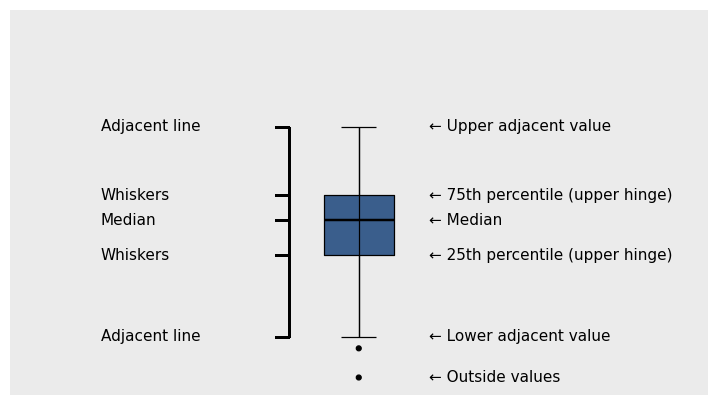

<ggplot: (357965394)>

In [8]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_boxplot(color="black", fill=color[0], size=0.5, width=0.1, alpha=0.5)
    + stat_boxplot(geom="errorbar", width=0.05, color="black", size=0.5)
    + scale_y_continuous(limits=[mmin, mmax])
    + annotate("text", x=1.1, y=ub, label="← Upper adjacent value", ha="left")
    + annotate("text", x=1.1, y=q3, label="← 75th percentile (upper hinge)", ha="left")
    + annotate("text", x=1.1, y=q2, label="← Median", ha="left")
    + annotate("text", x=1.1, y=q1, label="← 25th percentile (upper hinge)", ha="left")
    + annotate("text", x=1.1, y=lb, label="← Lower adjacent value", ha="left")
    + annotate("text", x=1.1, y=out_lb, label="← Outside values", ha="left")
    + annotate("text", x=0.63, y=ub, label="Adjacent line", ha="left")
    + annotate("text", x=0.63, y=q3, label="Whiskers", ha="left")
    + annotate("text", x=0.63, y=q2, label="Median", ha="left")
    + annotate("text", x=0.63, y=q1, label="Whiskers", ha="left")
    + annotate("text", x=0.63, y=lb, label="Adjacent line", ha="left")
    + geom_segment(aes(x=0.9, y=lb, xend=0.9, yend=ub))
    + geom_segment(aes(x=0.88, y=lb, xend=0.9, yend=lb))
    + geom_segment(aes(x=0.88, y=q1, xend=0.9, yend=q1))
    + geom_segment(aes(x=0.88, y=q2, xend=0.9, yend=q2))
    + geom_segment(aes(x=0.88, y=q3, xend=0.9, yend=q3))
    + geom_segment(aes(x=0.88, y=ub, xend=0.9, yend=ub))
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
        figure_size=(9, 5),
    )
)

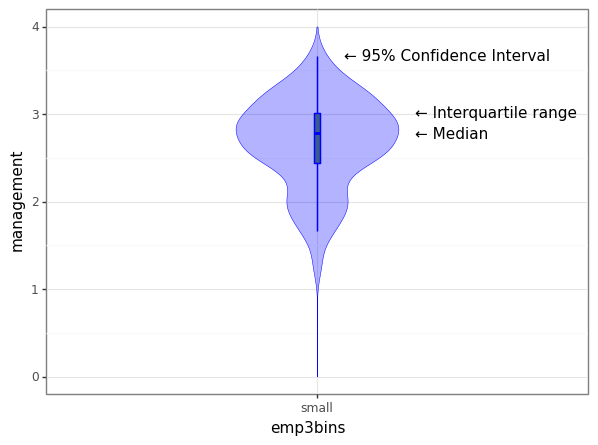

<ggplot: (357982193)>

In [9]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_violin(
        size=0.2,
        width=0.3,
        trim=False,
        show_legend=False,
        color="blue",
        fill="blue",
        alpha=0.3,
    )
    + geom_boxplot(
        color="blue", fill=color[0], size=0.6, width=0.01, alpha=0.5, outlier_color=""
    )
    + annotate("text", x=1.05, y=ub, label="← 95% Confidence Interval", ha="left")
    + annotate("text", x=1.18, y=q3, label="← Interquartile range", ha="left")
    + annotate("text", x=1.18, y=q2, label="← Median", ha="left")
    + ylim(0, 4)
    + theme_bw()
    + theme(figure_size=(7, 5))
)